In [14]:
import pandas as pd
import seaborn as sn

In [15]:
df = pd.read_csv('../../text-analysis-simplification.csv')

In [16]:
df.head()

,sentence,source,title,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,...,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
0,Sinds het einde van de 20e eeuw zijn er nieuwe...,ChatGPT,AISurveillance.pdf,26,14.911667,16.082500,14.815586,30.900000,17.933333,49.000000,...,20.616900,1,0,0,0,0,0,0,0,1
1,Het gebruik van deze technologieën door de po...,ChatGPT,AISurveillance.pdf,16,12.627143,15.848571,19.884861,29.467857,19.885714,56.857143,...,18.993043,0,2,0,1,0,1,0,1,0
2,Dit roept de vraag op of de huidige controlem...,ChatGPT,AISurveillance.pdf,32,15.251034,19.543448,16.227763,37.372414,21.255172,66.931034,...,19.775934,1,0,0,0,0,1,0,0,0
3,Om tot een (voorlopig) antwoord op die vraag ...,ChatGPT,AISurveillance.pdf,32,14.606667,16.666667,13.809259,38.430000,18.207407,52.925926,...,19.011256,0,1,0,0,1,0,0,0,0
4,Deze ontwikkelingen zijn de fragmentatie en pr...,ChatGPT,AISurveillance.pdf,27,17.662727,20.613182,21.607883,7.614091,23.345455,67.454545,...,20.517700,1,0,0,0,0,1,0,0,0


In [17]:
df.groupby(['source']).mean()

C:\Users\dylan\AppData\Local\Temp\ipykernel_15296\2702724130.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['source']).mean()


,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
source,,,,,,,,,,,,,,,,,,,
ChatGPT,24.876712,14.931366,17.515203,17.953331,25.830237,19.235956,57.860774,15.553883,7.767123,19.437056,0.424658,1.191781,0.000000,0.109589,0.178082,0.684932,0.000000,0.273973,0.054795
GPT3Custom,21.150943,14.578762,16.865678,18.616402,21.928035,18.060706,56.728257,14.243041,6.773585,19.188826,0.433962,0.773585,0.000000,0.075472,0.169811,0.584906,0.000000,0.094340,0.113208
GPT3CustomLS,21.290323,13.799669,15.375551,16.916776,27.841118,16.417596,53.051470,13.332015,6.290323,18.880576,0.612903,0.967742,0.032258,0.064516,0.129032,0.677419,0.000000,0.064516,0.161290
Original,22.348485,10.097140,12.738455,13.311697,52.842053,14.001140,50.160527,11.549871,5.242424,14.977329,0.545455,0.393939,0.000000,0.121212,0.090909,0.984848,0.000000,0.136364,0.075758
Resoomer,17.025641,9.743744,12.933784,14.855909,51.852957,13.956281,48.937631,11.630957,5.051282,18.405488,0.500000,0.384615,0.000000,0.064103,0.089744,0.435897,0.025641,0.256410,0.089744
SciSpace,28.555556,18.195695,21.050540,20.854543,5.811567,21.660189,65.515325,16.994738,9.622222,19.528266,0.400000,1.088889,0.000000,0.111111,0.022222,0.733333,0.000000,0.377778,0.044444


* Kincaid: This metric measures the US grade level required to understand the text.
* ARI: This metric also measures the US grade level required to understand the text.
* Coleman-Liau: This metric measures the US grade level required to understand the text.
* Flesch Reading Ease: This metric measures how easy or difficult a text is to read. The higher the score, the easier it is to read.
* Gunning Fog Index: This metric measures the years of formal education required to understand the text.
* LIX: This metric measures the complexity of a text by dividing the number of words by the number of sentences and adding the number of long words (more than six letters) per 100 words.
* SMOG Index: This metric measures the years of education required to understand the text.
* RIX: This metric measures how complex a text is by dividing long sentences (more than 10 words) by short sentences (less than 10 words).
* Dale-Chall Index: This metric measures how easy or difficult a text is to read. The higher the score, the more difficult it is to read.

In [18]:
df.groupby(['title']).mean()

C:\Users\dylan\AppData\Local\Temp\ipykernel_15296\2399029387.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['title']).mean()


,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
title,,,,,,,,,,,,,,,,,,,
AISurveillance.pdf,23.065421,14.278690,17.726924,18.393864,27.431483,17.428157,58.520628,13.949108,7.485981,18.799723,0.299065,0.616822,0.000000,0.065421,0.074766,0.672897,0.000000,0.224299,0.065421
TheImpactofAIOnJobsAndSexualDiscrimination.pdf,23.228758,13.160530,15.193542,16.148710,34.141809,16.649126,52.550985,13.576378,6.398693,17.410294,0.699346,0.921569,0.006536,0.091503,0.117647,0.823529,0.013072,0.143791,0.143791
VirtualRealityStotterTherapie.pdf,19.337209,11.561656,14.239390,15.797369,41.228245,16.809678,54.057458,13.582977,5.976744,19.171735,0.313953,0.651163,0.000000,0.127907,0.162791,0.418605,0.000000,0.313953,0.000000


Hypothese 1:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen hebben een significant eenvoudigere leesgraad vergeleken met de oorspronkelijke wetenschappelijke artikelen

Hypothese 2:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen zijn minstens even eenvoudig dan handmatig vereenvoudigde artikelen

Hypothese 3:

de gebruikte syntactische structuren in een automatisch vereenvoudigd wetenschappelijk artikel zijn minstens even eenvoudig als het aantal in een handmatig vereenvoudigd wetenschappelijk artikel

Hypothese 4:

iets met samenvatting

Hypothese 5:

iets met het prototype

<AxesSubplot: xlabel='sentence_length', ylabel='Count'>

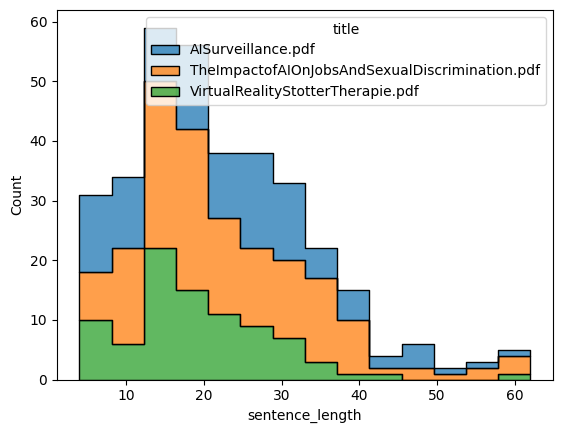

In [34]:
sn.histplot(data=df, x='sentence_length', hue='title', multiple="stack", element="step")

<AxesSubplot: xlabel='sentence_length', ylabel='Count'>

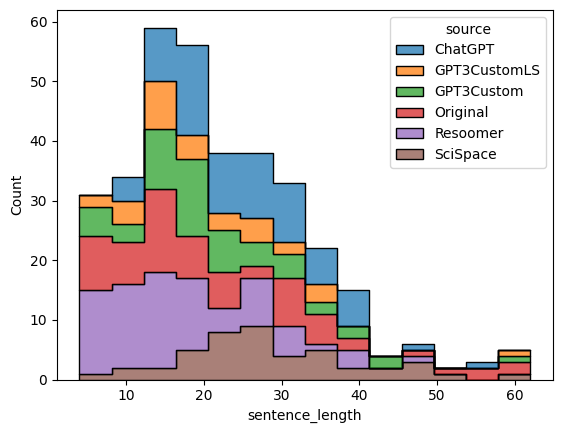

In [28]:
sn.histplot(data=df, x='sentence_length', hue='source', multiple="stack", element="step")

<AxesSubplot: xlabel='FleschReadingEase', ylabel='sentence_length'>

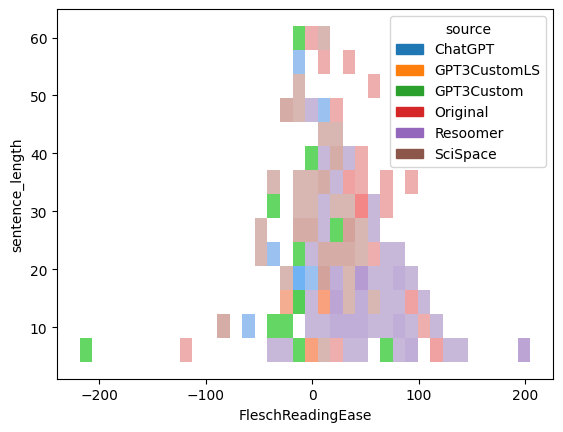

In [44]:
sn.histplot(data=df, x='FleschReadingEase', y='sentence_length', hue='source')